In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colnames = ["review", "rating", "article"]
df_supp = pd.read_csv('./data/allegro/supplements/data.csv', names=colnames, header=None)
df_rtvagd = pd.read_csv('./data/allegro/rtvagd/data.csv', names=colnames, header=None)

In [3]:
df_rtvagd.head(3)

,review,rating,article
0,"Pralka niestety "" tańczy"" bardziej niż bez pod...",1,Mata antywibracyjna SPI 55 4 mm 9 cm x 4 cm
1,Podkładki nie są całe z gumy. Maja tylko gumow...,3,Mata antywibracyjna SPI 55 4 mm 9 cm x 4 cm
2,"Plastikowe, ale pewien efekt antywibracyjny je...",3,Mata antywibracyjna SPI 55 4 mm 9 cm x 4 cm


In [4]:
df_supp.head(3)

,review,rating,article
0,"Trochę za dużo słodzików, mógłby być mniej sło...",4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...
1,"Żonie nie smakowało, dla mnie OK",4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...
2,Za słodkie i bardzo bardzo czuć że sztuczne ni...,1,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...


In [5]:
# Pominięcie wielkości liter
df_supp['review'] = df_supp['review'].apply(lambda x: x.lower())
df_rtvagd['review'] = df_rtvagd['review'].apply(lambda x: x.lower())

In [6]:
# Najpopularniejsze opinie:
print("10 Najpopularniejszych opinii dla RTVAGD:")
df_rtvagd.groupby('review').count().sort_values('rating', ascending=False).head(10)

10 Najpopularniejszych opinii dla RTVAGD:


,rating,article
review,,
ok,2339,2339
polecam,1284,1284
super,467,467
wszystko ok,203,203
ok.,168,168
polecam.,111,111
polecam!,77,77
wszystko ok.,63,63
jest ok,54,54


In [7]:
# Najpopularniejsze opinie:
print("10 Najpopularniejszych opinii dla suplementów:")
df_supp.groupby('review').count().sort_values('rating', ascending=False).head(10)

10 Najpopularniejszych opinii dla suplementów:


,rating,article
review,,
ok,1179,1179
polecam,647,647
super,195,195
wszystko ok,110,110
ok.,98,98
polecam!,68,68
polecam.,54,54
działa,41,41
jest ok,41,41


In [8]:
# Usunięcie duplikatów
df_supp = df_supp.drop_duplicates(subset=['review'])
df_rtvagd = df_rtvagd.drop_duplicates(subset=['review'])

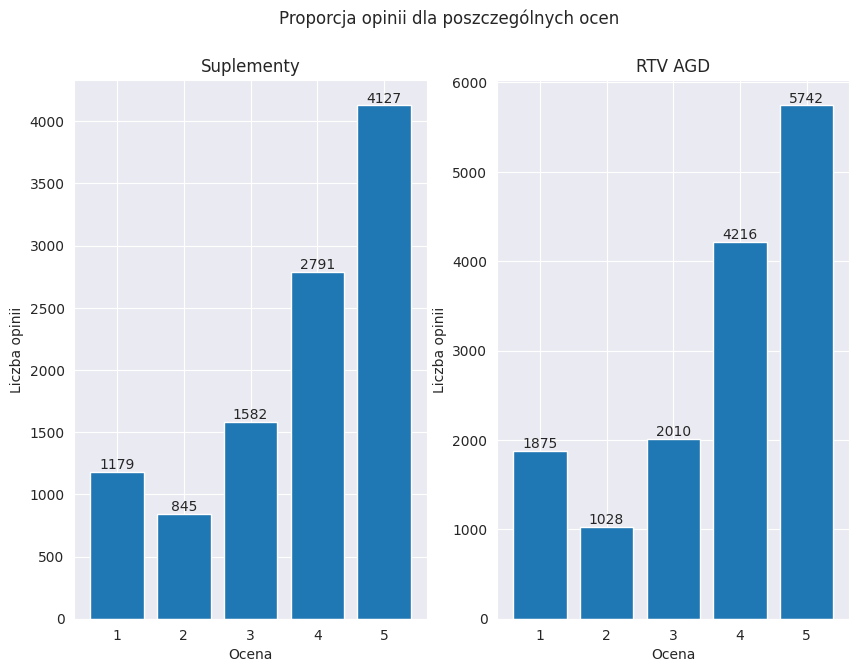

In [9]:
# Wykresy przedstawiające rozłożenie danych w zbiorze

grouped_supp = df_supp.groupby('rating').count()
grouped_rtvagd = df_rtvagd.groupby('rating').count()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7))
fig.suptitle("Proporcja opinii dla poszczególnych ocen")

bars1 = ax1.bar(grouped_supp.index, grouped_supp['review'])
bars2 = ax2.bar(grouped_rtvagd.index, grouped_rtvagd['review'])

ax1.set_xticks(grouped_supp.index)
ax1.set_xticklabels(grouped_supp.index)
ax1.set_title("Suplementy")
ax1.set_xlabel("Ocena")
ax1.set_ylabel("Liczba opinii")

ax2.set_xticks(grouped_rtvagd.index)
ax2.set_xticklabels(grouped_rtvagd.index)
ax2.set_title("RTV AGD")
ax2.set_xlabel("Ocena")
ax2.set_ylabel("Liczba opinii")

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom')

Podczas pobierania opinii w pewnym momencie zostało zastosowane filitrowanie opinii w celu pomijania tych z oceną '5'.
Oceny te stanowią lwią część wszystkich opinii praktycznie dla każdego dostępnego produktu. Stąd w celu uniknięcia
silnego niezbalansowania danych w pewnym momencie, zostały pobierane tylko opinie z ocenami 1-4.

In [10]:
# Długości poszczególnych opinii
df_supp['review_length'] = df_supp.apply(lambda x: len(x['review'].split(" ")), axis=1)
df_rtvagd['review_length'] = df_rtvagd.apply(lambda x: len(x['review'].split(" ")), axis=1)

In [11]:
print(f"Najkrótsza opinia w kategorii RTVAGD: {df_rtvagd['review_length'].min()}")
print(f"Najdłuższa opinia w kategorii RTVAGD: {df_rtvagd['review_length'].max()}")
print(f"Średnia długość opinii w kategorii RTVAGD: {df_rtvagd['review_length'].mean()}")
print(f"Mediana długość opinii w kategorii RTVAGD: {df_rtvagd['review_length'].median()}")

Najkrótsza opinia w kategorii RTVAGD: 1
Najdłuższa opinia w kategorii RTVAGD: 555
Średnia długość opinii w kategorii RTVAGD: 12.541994485912179
Mediana długość opinii w kategorii RTVAGD: 8.0


In [12]:
print(f"Najkrótsza opinia w kategorii suplementy: {df_supp['review_length'].min()}")
print(f"Najdłuższa opinia w kategorii suplementy: {df_supp['review_length'].max()}")
print(f"Średnia długość opinii w kategorii suplementy: {df_supp['review_length'].mean()}")
print(f"Mediana długość opinii w kategorii suplementy: {df_supp['review_length'].median()}")

Najkrótsza opinia w kategorii suplementy: 1
Najdłuższa opinia w kategorii suplementy: 283
Średnia długość opinii w kategorii suplementy: 11.658494868871152
Mediana długość opinii w kategorii suplementy: 7.0


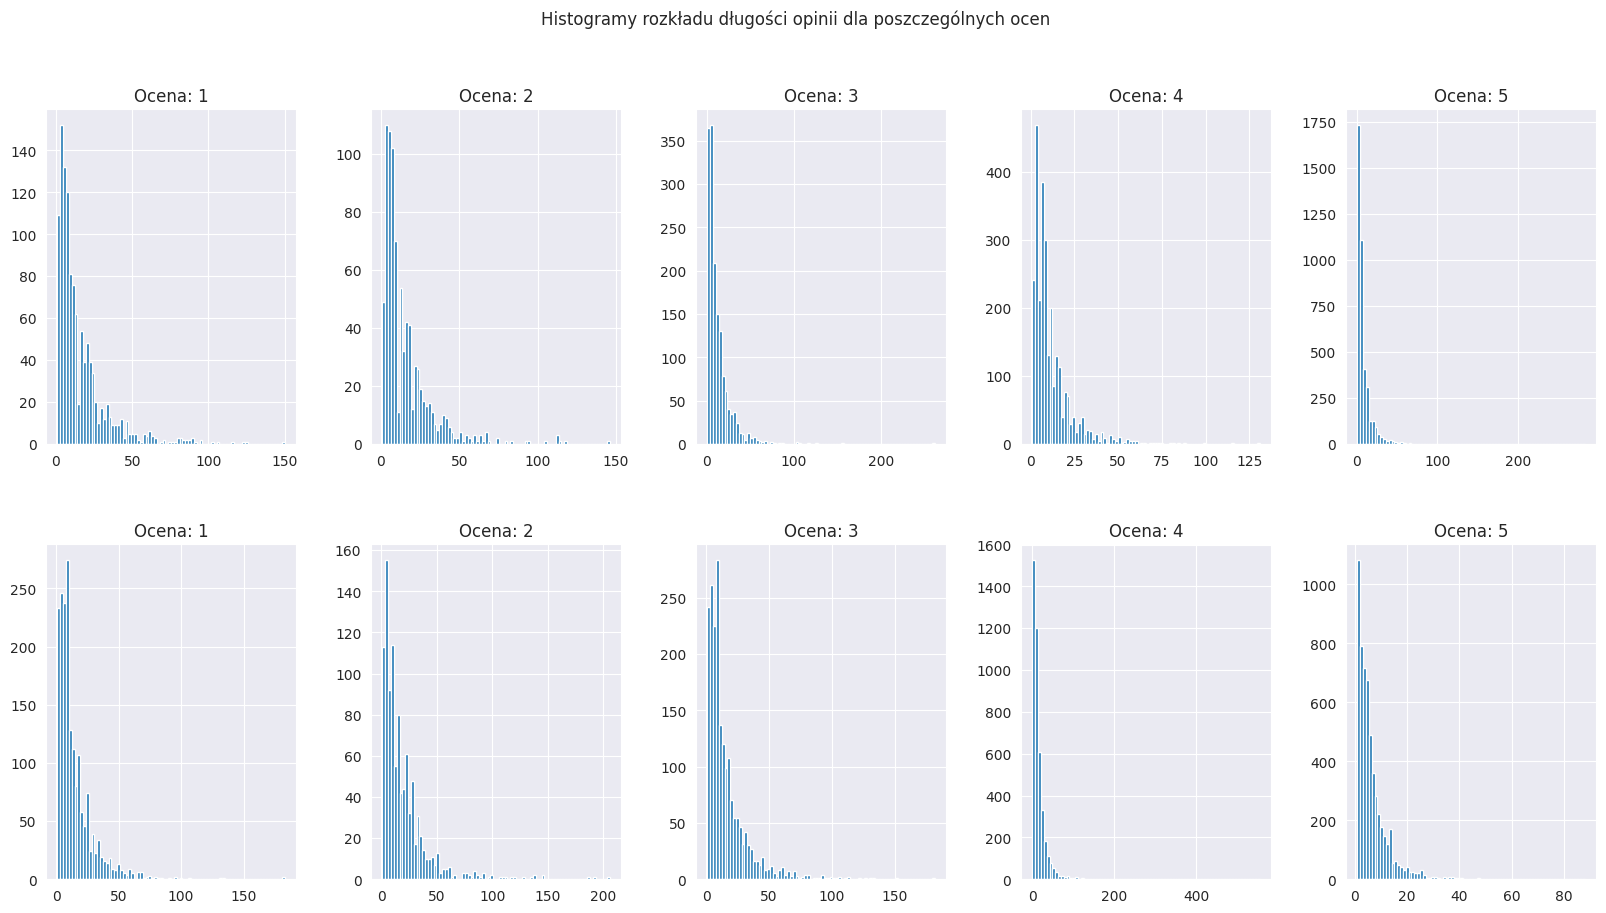

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle("Histogramy rozkładu długości opinii dla poszczególnych ocen")

for i in range(5):
    df_supp[df_supp['rating'] == i + 1].hist(column='review_length', bins=80, ax=axes[0, i])
    axes[0, i].set_title(f"Ocena: {i + 1}")

for i in range(5):
    df_rtvagd[df_rtvagd['rating'] == i + 1].hist(column='review_length', bins=80, ax=axes[1, i])
    axes[1, i].set_title(f"Ocena: {i + 1}")

Text(0.5, 1.0, 'Rozkład długości opinii dla opinii suplementów')

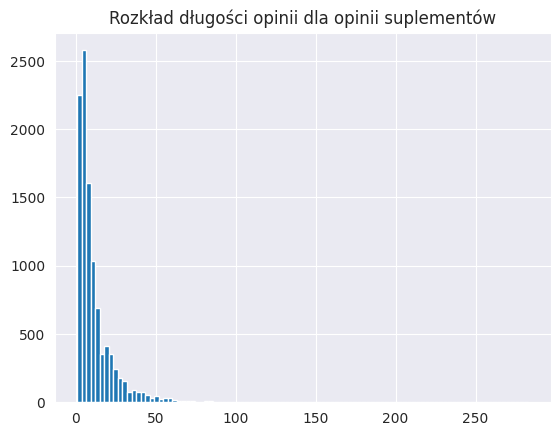

In [14]:
df_supp.hist(column='review_length', bins=100)
plt.title("Rozkład długości opinii dla opinii suplementów")

Text(0.5, 1.0, 'Rozkład długości opinii dla opinii RTVAGD')

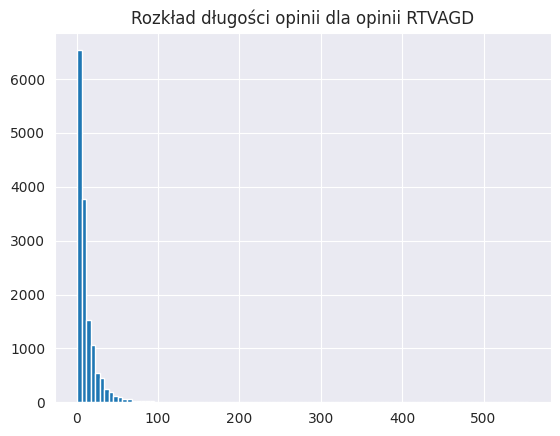

In [15]:
df_rtvagd.hist(column='review_length', bins=100)
plt.title("Rozkład długości opinii dla opinii RTVAGD")

Text(0.5, 1.0, 'Rozkład długości opinii dla opinii RTVAGD (0-80)')

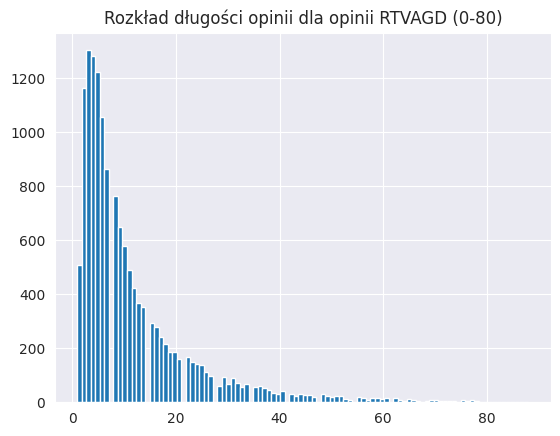

In [16]:
df_rtvagd[(df_rtvagd['review_length'] > 0) & ((df_rtvagd['review_length'] < 80) | (df_rtvagd['rating'] == 5))].hist(
    column='review_length', bins=100)
plt.title("Rozkład długości opinii dla opinii RTVAGD (0-80)")

## Tokenizacja tekstu

In [17]:
# Usuwanie znaków interpunkcyjnych
import string

df_supp['review'] = df_supp['review'].apply(lambda x: ''.join(char for char in x if char not in string.punctuation))
df_rtvagd['review'] = df_rtvagd['review'].apply(lambda x: ''.join(char for char in x if char not in string.punctuation))
df_supp.head(5)

,review,rating,article,review_length
0,trochę za dużo słodzików mógłby być mniej słod...,4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,11
1,żonie nie smakowało dla mnie ok,4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,6
2,za słodkie i bardzo bardzo czuć że sztuczne ni...,1,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,14
3,średni w smaku zjadliwe ale więcej nie kupię,3,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,8
4,zepsute,1,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,1


In [18]:
# Usuwanie znaków które nie są literami np. emotikony
import re

df_supp['review'] = df_supp['review'].apply(lambda x: re.sub('[^a-zA-ZąćęłńóśźżĄĆĘŁŃÓŚŹŻ ]', '', x))
df_rtvagd['review'] = df_rtvagd['review'].apply(lambda x: re.sub('[^a-zA-ZąćęłńóśźżĄĆĘŁŃÓŚŹŻ ]', '', x))
df_supp.head(5)

,review,rating,article,review_length
0,trochę za dużo słodzików mógłby być mniej słod...,4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,11
1,żonie nie smakowało dla mnie ok,4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,6
2,za słodkie i bardzo bardzo czuć że sztuczne ni...,1,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,14
3,średni w smaku zjadliwe ale więcej nie kupię,3,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,8
4,zepsute,1,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,1


In [19]:
# Usuwanie słów które mogą pojawiać się w każdym typie opini - stopwords
"""
Polskie stopwords zaczerpnięte z gotowego źródła na Githubie - https://github.com/bieli/stopwords/blob/master/polish.stopwords.txt
Na chwile obecną - wykomentowane, ponieważ klasyfikator daje gorsze wyniki po usunięciu stopwords. Może być to spowodowane złym
dopasowaniem słów do problemu. Można spróbować też utworzyć nową liste (zmodyfikować obecną) stopwords.
"""


# stop_words = []
#
# with open('data/polish.stopwords.txt', 'r') as file:
#     for line in file:
#         stop_words.append(line.strip())
#
# df_supp['review'] = df_supp['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

'\nPolskie stopwords zaczerpnięte z gotowego źródła na Githubie - https://github.com/bieli/stopwords/blob/master/polish.stopwords.txt\nNa chwile obecną - wykomentowane, ponieważ klasyfikator daje gorsze wyniki po usunięciu stopwords. Może być to spowodowane złym\ndopasowaniem słów do problemu. Można spróbować też utworzyć nową liste (zmodyfikować obecną) stopwords.\n'

In [20]:
# lematyzacja za pomocą morfeusz2
"""
Link do narzędzia: http://morfeusz.sgjp.pl/
Jest to narzędzie które pozwala na przeprowadzenie Lemmatyzacji polskich tekstów.
"""
from nltk.tokenize import word_tokenize
from morfeusz2 import Morfeusz

# Inicjalizacja Morfeusza
morfeusz = Morfeusz()


def morfeusz2_lemmatization(phrase, morfeusz):
    stemmed_phrase = []
    tokens = word_tokenize(phrase)
    for token in tokens:
        analysis = morfeusz.analyse(token)
        # wybieranie bezokoliczników
        stemmed_phrase.append(analysis[0][2][1].split(':')[0])
    return " ".join(stemmed_phrase)

df_supp['review'] = df_supp['review'].apply(lambda x: morfeusz2_lemmatization(x, morfeusz))
df_rtvagd['review'] = df_rtvagd['review'].apply(lambda x: morfeusz2_lemmatization(x, morfeusz))
df_supp.head(3)

,review,rating,article,review_length
0,trocha za dużo słodzik móc być mniej słodki a ...,4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,11
1,żona nie smakować dla miąć oko,4,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,6
2,za słodki i bardzo bardzo czuć że sztuczny nie...,1,Dżem Owoce egzotyczne KFD DZEM1000#OE 1000 g 1...,14


In [21]:
# Połączona ramka danych, która zawiera zarówno opinie o suplementach jak i opinie o sprzęcie rtvagd
df_merged = pd.concat([df_supp, df_rtvagd])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25395 entries, 0 to 22076
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review         25395 non-null  object
 1   rating         25395 non-null  int64 
 2   article        25395 non-null  object
 3   review_length  25395 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 992.0+ KB


## Wektoryzacja tekstu

In [22]:
# Zamiana tekstu na wektory - wykorzystując podejście bag-of-words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=1000)

X_supp = tfidf_vect.fit_transform(df_supp['review'])
X_rtvagd = tfidf_vect.fit_transform(df_rtvagd['review'])
X_merged = tfidf_vect.fit_transform(df_merged['review'])

# słownik mapujący słowo na jego numer
# tfidf_vect.vocabulary_

In [23]:
X_supp

<10524x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 85762 stored elements in Compressed Sparse Row format>

In [24]:
# Etykiety dla opinii
y_supp = df_supp['rating']
y_rtvagd = df_rtvagd['rating']
y_merged = df_merged['rating']

y_supp

0        4
1        4
2        1
3        3
4        1
        ..
14733    1
14734    3
14735    1
14736    1
14737    4
Name: rating, Length: 10524, dtype: int64

# Budowanie modeli
## 1. SVM Klasyfikator

In [25]:
"""
W celu dobrania odpowiednich parametrów dla klasyfikatora SVC została wykorzystana technika GridSearch.
Poniższe modele zostały zbudowane własnie z tymi parametrami. W celu przeprowadzenia operacji GridSearch
zastosowano jedynie 30% zbioru suplementów, aby uniknąć długiego czasu wykonywania. Wyniki nie dają znacznej
poprawy wydajności klasyfikatora a jedynie minimalną różnicę. Może to być spowodowane małą ilością danych
zastosowanych w operacji (wspomniane 30%).
Parametry jakie udało się uzyskać:
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

Poniższy kod wykomentowany, z powodów długiego czasu wykonywania.
W przyszłości można roważyć wykonanie tej operacji z większa ilością danych i ewentualne skorygowanie parametrów.
 """

# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
#
#
# X_train, _, y_train, _ = train_test_split(
#     X_supp, y_supp, test_size=0.7, random_state=42)
#
#
# param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
# grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
# grid.fit(X_train,y_train)

# grid.best_params_
# {'C': 1, 'gamma': 1, 'kernel': 'rbf'}

"\nW celu dobrania odpowiednich parametrów dla klasyfikatora SVC została wykorzystana technika GridSearch.\nPoniższe modele zostały zbudowane własnie z tymi parametrami. W celu przeprowadzenia operacji GridSearch\nzastosowano jedynie 30% zbioru suplementów, aby uniknąć długiego czasu wykonywania. Wyniki nie dają znacznej\npoprawy wydajności klasyfikatora a jedynie minimalną różnicę. Może to być spowodowane małą ilością danych\nzastosowanych w operacji (wspomniane 30%).\nParametry jakie udało się uzyskać:\n{'C': 1, 'gamma': 1, 'kernel': 'rbf'}\n\nPoniższy kod wykomentowany, z powodów długiego czasu wykonywania.\nW przyszłości można roważyć wykonanie tej operacji z większa ilością danych i ewentualne skorygowanie parametrów.\n "

### 1.1. SVM - opinie o suplementach

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_supp_train, X_supp_test, y_supp_train, y_supp_test = train_test_split(
    X_supp, y_supp, test_size=0.33, random_state=42)

svc = SVC(C=1, gamma=1, kernel='rbf')
svc.fit(X_supp_train, y_supp_train)

y_supp_pred = svc.predict(X_supp_test)

### 1.2 SVM - opinie o rtvagd

In [27]:
X_rtvagd_train, X_rtvagd_test, y_rtvagd_train, y_rtvagd_test = train_test_split(
    X_rtvagd, y_rtvagd, test_size=0.33, random_state=42)

svc = SVC(C=1, gamma=1, kernel='rbf')
svc.fit(X_rtvagd_train, y_rtvagd_train)

y_rtvagd_pred = svc.predict(X_rtvagd_test)

### 1.3 SVM - opinie o rtvagd i suplementach

In [28]:
X_merged_train, X_merged_test, y_merged_train, y_merged_test = train_test_split(
    X_merged, y_merged, test_size=0.33, random_state=42)

svc = SVC(C=1, gamma=1, kernel='rbf')
svc.fit(X_merged_train, y_merged_train)

y_merged_pred = svc.predict(X_merged_test)

### Oceny modeli

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix


def display_confusion_matrix(y_true, y_pred, title):
    """Funkcja wyświetla macierz pomyłek dla klasyfikatorów"""
    # Obliczanie macierzy pomyłek
    cm = confusion_matrix(y_true, y_pred)

    # Definicja listy kolorów
    colors = ['1', '2', '3', '4', '5']

    # Tworzenie wykresu macierzy pomyłek
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Dodawanie tekstu w komórkach macierzy
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

    # Zmiana kolorów komórek macierzy
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(0.5)
    ax.set_xticks(np.arange(len(colors)))
    ax.set_yticks(np.arange(len(colors)))
    ax.set_xticklabels(colors)
    ax.set_yticklabels(colors)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    # Dodawanie skali kolorów
    cbar = ax.figure.colorbar(im, ax=ax)

    ax.set_title(title)
    # Wyświetlanie wykresu
    plt.show()

### 1.1 SVM - F1 i dokładność

In [30]:
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix

In [31]:
# F1
f1_supp = f1_score(y_supp_test, y_supp_pred, average='weighted')
f1_rtvagd = f1_score(y_rtvagd_test, y_rtvagd_pred, average='weighted')
f1_merged = f1_score(y_merged_test, y_merged_pred, average='weighted')

In [32]:
# Dokładność
acc_supp = accuracy_score(y_supp_test, y_supp_pred)
acc_rtvagd = accuracy_score(y_rtvagd_test, y_rtvagd_pred)
acc_merged = accuracy_score(y_merged_test, y_merged_pred)

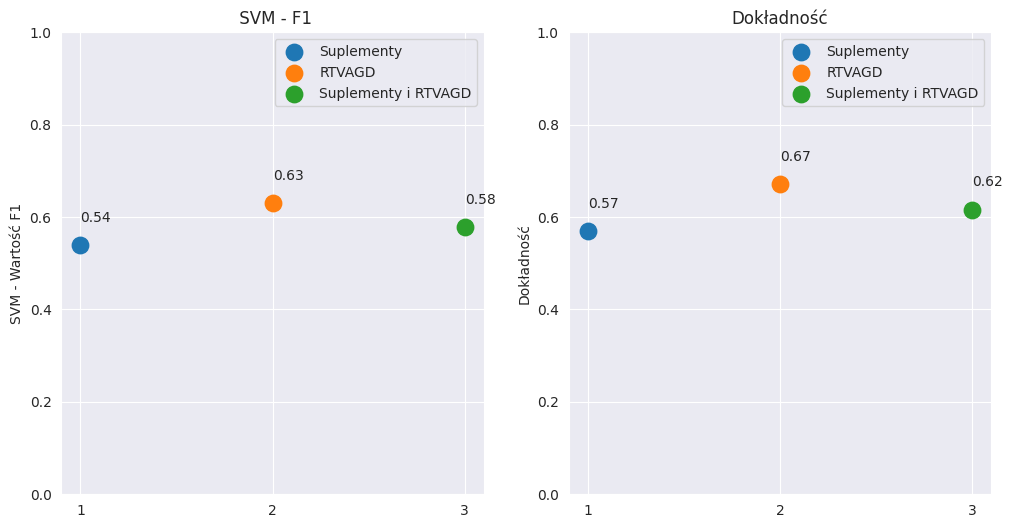

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(1, f1_supp, s=140,  label="Suplementy")
ax1.scatter(2, f1_rtvagd,s=140, label="RTVAGD")
ax1.scatter(3, f1_merged, s=140,label="Suplementy i RTVAGD")
ax1.set_title(" SVM - F1")
ax1.set_ylabel("SVM - Wartość F1")
ax1.annotate(round(f1_supp, 2), (1, f1_supp + 0.05))
ax1.annotate(round(f1_rtvagd, 2), (2, f1_rtvagd + 0.05))
ax1.annotate(round(f1_merged, 2), (3, f1_merged + 0.05))

ax2.scatter(1, acc_supp,s=140, label="Suplementy")
ax2.scatter(2, acc_rtvagd,s=140, label="RTVAGD")
ax2.scatter(3, acc_merged, s=140,label="Suplementy i RTVAGD")
ax2.set_title("Dokładność")
ax2.set_ylabel("Dokładność")
ax2.annotate(round(acc_supp, 2), (1, acc_supp + 0.05))
ax2.annotate(round(acc_rtvagd, 2), (2, acc_rtvagd + 0.05))
ax2.annotate(round(acc_merged, 2), (3, acc_merged + 0.05))

for ax in (ax1, ax2):
    ax.set_ylim([0, 1])
    ax.set_xticks([1,2,3])
    ax.legend()

### 1.2 SVM - Macierze pomyłek

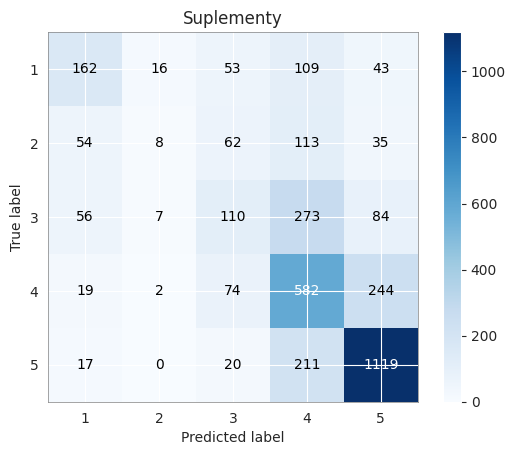

In [34]:
display_confusion_matrix(y_supp_test, y_supp_pred, "Suplementy")

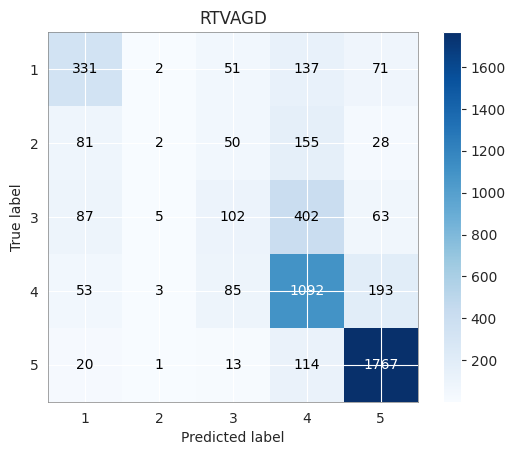

In [35]:
display_confusion_matrix(y_rtvagd_test, y_rtvagd_pred, "RTVAGD")

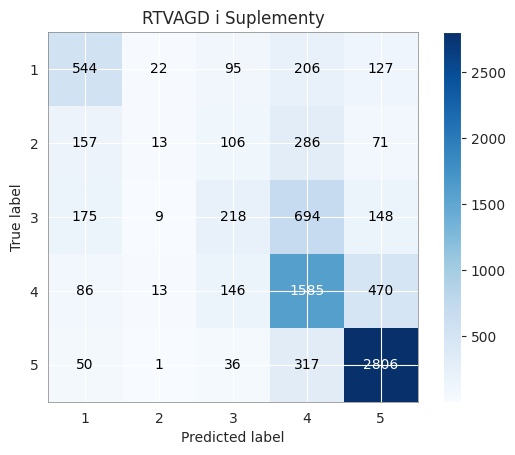

In [36]:
display_confusion_matrix(y_merged_test, y_merged_pred, "RTVAGD i Suplementy")